# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.568148e+01     1.643123e+01
 * time: 0.0015239715576171875
     1     3.421749e+01     9.879557e+00
 * time: 0.0060160160064697266
     2     2.608126e+01     3.819375e+00
 * time: 0.012106895446777344
     3     2.153446e+01     2.484587e+00
 * time: 0.017274856567382812
     4     1.959390e+01     1.931514e+00
 * time: 0.022537946701049805
     5     1.908895e+01     1.267908e+00
 * time: 0.02781391143798828
     6     1.873928e+01     1.504777e+00
 * time: 0.03219294548034668
     7     1.837640e+01     1.318900e+00
 * time: 0.03667497634887695
     8     1.810346e+01     1.267592e+00
 * time: 0.0412449836730957
     9     1.787005e+01     7.994837e-01
 * time: 0.0457758903503418
    10     1.773954e+01     7.347026e-01
 * time: 0.050293922424316406
    11     1.764690e+01     5.227786e-01
 * time: 0.05467581748962402
    12     1.758819e+01     5.135291e-01
 * time: 0.058151960372924805
    13     1.753771e+01     5.554270e-01
 

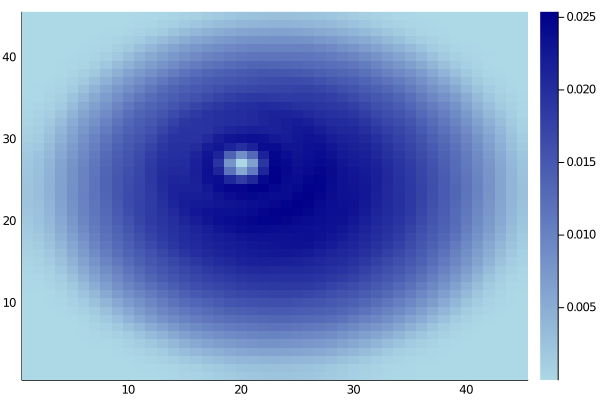

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)